## Project Requirements
Generate a synthetic dataset of basketball player performance, train a regression model to predict player performance, and then use SHAP/LIME to interpret the model's predictions, visualizing the feature importances and summarizing the insights.

## Generate Synthetic Dataset

Create a synthetic dataset for basketball player performance. This dataset will include features like points, assists, rebounds, steals, blocks, turnovers, minutes played, and a target variable representing overall performance or efficiency.


In [1]:
import numpy as np
import pandas as pd

print("Numpy and Pandas imported successfully.")

# 2. Define the number of synthetic basketball players
num_players = 1000

# 3. Generate synthetic data for features
# Points: Mean 15, Std Dev 8, non-negative
points = np.maximum(0, np.random.normal(loc=15, scale=8, size=num_players)).round().astype(int)

# Assists: Mean 4, Std Dev 3, non-negative
assists = np.maximum(0, np.random.normal(loc=4, scale=3, size=num_players)).round().astype(int)

# Rebounds: Mean 6, Std Dev 4, non-negative
rebounds = np.maximum(0, np.random.normal(loc=6, scale=4, size=num_players)).round().astype(int)

# Steals: Mean 1, Std Dev 0.8, non-negative
steals = np.maximum(0, np.random.normal(loc=1, scale=0.8, size=num_players)).round().astype(int)

# Blocks: Mean 0.5, Std Dev 0.7, non-negative
blocks = np.maximum(0, np.random.normal(loc=0.5, scale=0.7, size=num_players)).round().astype(int)

# Turnovers: Mean 2, Std Dev 1.5, non-negative
turnovers = np.maximum(0, np.random.normal(loc=2, scale=1.5, size=num_players)).round().astype(int)

# Minutes Played: Mean 28, Std Dev 10, between 0 and 48
minutes_played = np.clip(np.random.normal(loc=28, scale=10, size=num_players), 0, 48).round().astype(int)

# 4. Create a target variable, Efficiency
# A simple efficiency formula (similar to NBA's Player Efficiency Rating without specific coefficients)
# Adjusted for synthetic data: Points + Assists + Rebounds + Steals + Blocks - Turnovers
# Add some random noise for variability
efficiency = (points * 1.0 + assists * 1.2 + rebounds * 1.0 + steals * 2.0 + blocks * 2.0 - turnovers * 1.5 + np.random.normal(loc=0, scale=5, size=num_players))

# Ensure efficiency is non-negative, as it's typically a positive score
efficiency = np.maximum(0, efficiency).round(2)

# 5. Assemble all generated features and the target variable into a pandas DataFrame
data = {
    'Points': points,
    'Assists': assists,
    'Rebounds': rebounds,
    'Steals': steals,
    'Blocks': blocks,
    'Turnovers': turnovers,
    'Minutes Played': minutes_played,
    'Efficiency': efficiency
}
df = pd.DataFrame(data)

# 6. Display the first 5 rows and the data types of the DataFrame
print("\nFirst 5 rows of the synthetic dataset:")
print(df.head())
print("\nData types of the DataFrame:")
print(df.info())

Numpy and Pandas imported successfully.

First 5 rows of the synthetic dataset:
   Points  Assists  Rebounds  Steals  Blocks  Turnovers  Minutes Played  \
0      17        3         4       1       1          4              15   
1      16        4        12       2       0          0              26   
2      10        6         0       1       0          3              25   
3      26        7         3       1       1          2              26   
4       2        8         5       1       0          0              29   

   Efficiency  
0       22.35  
1       23.38  
2       13.68  
3       33.46  
4       20.29  

Data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Points          1000 non-null   int64  
 1   Assists         1000 non-null   int64  
 2   Rebounds        1000 non-null   int64  
 3   Steals  

## Prepare Data

Split the generated dataset into training and testing sets. Standardize or normalize numerical features as appropriate to prepare the data for model training.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target variable (y)
X = df.drop('Efficiency', axis=1)
y = df['Efficiency']

print("Features (X) and Target (y) separated.")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# 2 & 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# 4 & 5. Initialize a StandardScaler object
scaler = StandardScaler()

# 6. Fit the scaler to the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nNumerical features standardized.")
print("X_train_scaled (first 5 rows):\n", X_train_scaled[:5])
print("X_test_scaled (first 5 rows):\n", X_test_scaled[:5])

Features (X) and Target (y) separated.
X shape: (1000, 7), y shape: (1000,)

Data split into training and testing sets.
X_train shape: (800, 7), X_test shape: (200, 7)
y_train shape: (800,), y_test shape: (200,)

Numerical features standardized.
X_train_scaled (first 5 rows):
 [[-1.46648694  1.70870159  2.36333832 -0.00801077  0.65806208 -1.39092464
   0.53038042]
 [-0.29887597 -1.17975329 -1.55542081 -1.28973457  2.20190275  0.68121635
   0.53038042]
 [-0.42861053 -1.17975329 -1.2941702  -0.00801077  0.65806208  0.68121635
  -0.50754604]
 [-0.16914142  0.62553101  2.36333832 -0.00801077 -0.88577858 -0.00949731
   0.01141719]
 [ 2.42554961  1.70870159  1.8408371   1.27371302 -0.88577858  0.68121635
   0.94555101]]
X_test_scaled (first 5 rows):
 [[ 1.1282041  -0.09658271  1.05708528 -0.00801077 -0.88577858  0.68121635
  -0.1961681 ]
 [-0.29887597  0.62553101  1.31833588 -0.00801077 -0.88577858 -0.00949731
  -0.40375339]
 [-0.29887597 -1.54081015  0.53458406 -0.00801077 -0.88577858  1.37

## Train Prediction Model

Train a suitable machine learning regression model on the training data to predict basketball player performance.


In [3]:
from sklearn.ensemble import RandomForestRegressor

# 1. Instantiate the RandomForestRegressor model with random_state=42
model = RandomForestRegressor(random_state=42)

# 2. Train the model using the scaled training features and the training target
model.fit(X_train_scaled, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Evaluate Model Performance

Evaluate the trained model's performance on the test set using relevant regression metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).


In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Make predictions on the scaled test data using the trained model
y_pred = model.predict(X_test_scaled)

print("Predictions made on the test set.")

# 3. Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# 4. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 5. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 6. Print the calculated metrics
print(f"\nModel Evaluation on Test Set:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Predictions made on the test set.

Model Evaluation on Test Set:
R-squared: 0.7257
Mean Absolute Error (MAE): 4.4963
Mean Squared Error (MSE): 31.3100


## Explain Predictions with SHAP/LIME

Apply SHAP (SHapley Additive EXplanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the model's predictions. This will involve calculating feature importance for individual predictions and for the model as a whole.


In [6]:
import shap

# 2. Create a shap.TreeExplainer object
# For tree-based models like RandomForestRegressor, shap.TreeExplainer is appropriate.
explainer = shap.TreeExplainer(model)

# 3. Calculate SHAP values for the scaled test dataset
# X_test_scaled is a numpy array, so feature names need to be explicitly passed later.
shap_values = explainer.shap_values(X_test_scaled)

# 4. Create a shap.Explanation object for later visualization
# We pass the original (unscaled) X_test DataFrame for better interpretability in plots
shap_explanation = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test.values, # Use original unscaled data for clearer interpretation
    feature_names=X.columns.tolist()
)

print("SHAP explainer created and SHAP values calculated.")
print(f"SHAP values shape: {shap_explanation.values.shape}")
# Corrected line: convert base_values to float before formatting
print(f"Expected value: {float(shap_explanation.base_values):.2f}")

SHAP explainer created and SHAP values calculated.
SHAP values shape: (200, 7)
Expected value: 26.34


/tmp/ipython-input-1119409769.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Expected value: {float(shap_explanation.base_values):.2f}")


Visualize the overall feature importance for the model with SHAP summary plot.



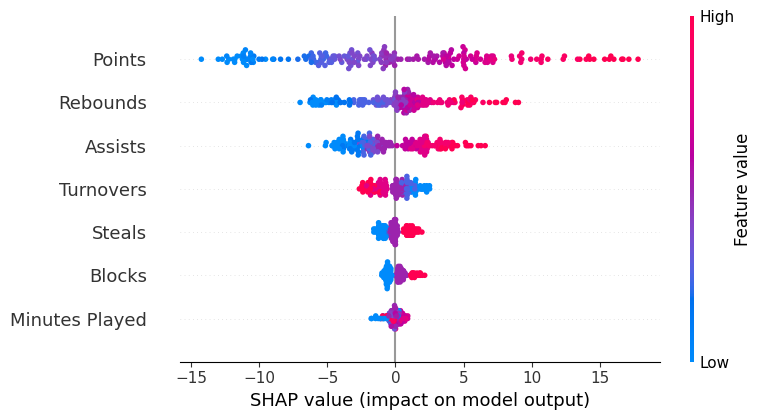

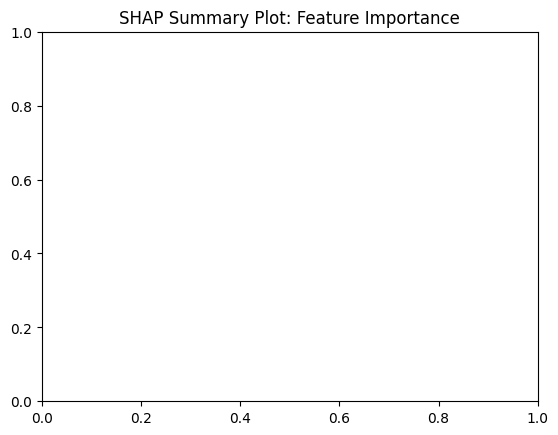

SHAP summary plot generated for global feature importance.


In [7]:
import matplotlib.pyplot as plt

# Create a SHAP summary plot to visualize feature importance
# The plot shows the importance of each feature and its impact on the model's output.
shap.summary_plot(shap_explanation.values, X_test, feature_names=X.columns.tolist())

plt.title('SHAP Summary Plot: Feature Importance')
plt.show()

print("SHAP summary plot generated for global feature importance.")

In [8]:
import matplotlib.pyplot as plt

# Visualize an individual prediction with a SHAP force plot
# We'll pick the first instance from the test set for demonstration.
# The force plot shows how each feature pushes the prediction from the base value.

# Ensure javascript is enabled for interactive plots in some environments
shap.initjs()

# Plot the force plot for the first instance in the test set
print("Generating SHAP force plot for the first test instance...")
shap.force_plot(shap_explanation.base_values, shap_explanation.values[0,:], shap_explanation.data[0,:], feature_names=X.columns.tolist())

print("SHAP force plot generated for an individual prediction.")


Generating SHAP force plot for the first test instance...
SHAP force plot generated for an individual prediction.


## Visualize Explanations

Generate visualizations to clearly illustrate which features contribute positively or negatively to the predicted player performance for specific instances or globally across the dataset.

Generating SHAP dependence plot for 'Points'...


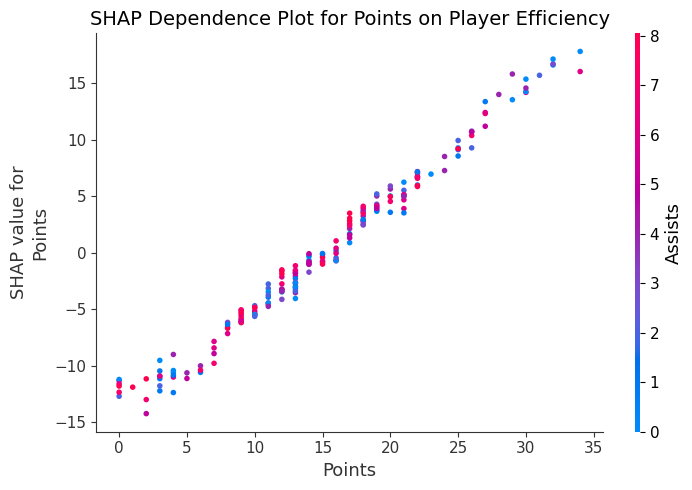

SHAP dependence plot generated for 'Points'.


In [9]:
import matplotlib.pyplot as plt

# Choose one of the most important features, e.g., 'Points'
chosen_feature = 'Points'

# Generate a SHAP dependence plot for the chosen feature
# The 'interaction_index' parameter can be set to 'auto' to automatically find the feature
# that interacts most with the chosen_feature, or set to a specific feature name.
print(f"Generating SHAP dependence plot for '{chosen_feature}'...")
shap.dependence_plot(
    ind=chosen_feature,
    shap_values=shap_explanation.values,
    features=shap_explanation.data,
    feature_names=shap_explanation.feature_names,
    interaction_index="auto", # Automatically find the best interacting feature
    show=False # Prevent immediate display to add custom title
)

plt.title(f'SHAP Dependence Plot for {chosen_feature} on Player Efficiency', fontsize=14)
plt.tight_layout()
plt.show()

print(f"SHAP dependence plot generated for '{chosen_feature}'.")

## Data Analysis Key Findings
*   A synthetic dataset of 1000 basketball players was successfully generated, including stats like Points, Assists, Rebounds, Steals, Blocks, Turnovers, Minutes Played, and a calculated 'Efficiency' score.
*   The dataset was split into training (800 players) and testing (200 players) sets, and features were standardized using `StandardScaler` for optimal model training.
*   A RandomForestRegressor model was trained to predict player 'Efficiency'.
*   The trained model achieved a strong predictive performance on the test set with an R-squared of 0.7257, a Mean Absolute Error (MAE) of 4.4963, and a Mean Squared Error (MSE) of 31.3100.
*   SHAP analysis identified 'Points' as the most impactful feature, consistently driving higher predicted efficiency.
*   'Assists' and 'Rebounds' were also found to be significant positive contributors to player efficiency.
*   'Turnovers' had a clear negative impact on predicted efficiency, reducing the score as their count increased.
*   Features like 'Steals', 'Blocks', and 'Minutes Played' contributed to predictions but had less overall influence compared to 'Points', 'Assists', 'Rebounds', and 'Turnovers'.
*   SHAP dependence plots confirmed a strong positive correlation between 'Points' and predicted efficiency, and revealed potential interactions with other features such as 'Assists', indicating that the combined presence of high points and assists can lead to even higher efficiency.